# Predicting Customer Churn in Python

## Chapter 1: Exploratory Data Analysis

### Weclome to the course

#### Customer Churn
* When an existing customer stops doing business or ends the relationship with a company

#### Types of Customer Churn
* Contractual churn
    * When a customer is under contract for a service and decides to cancel their service.
    * Found in cable TV, SAAS products, etc.
    
* Voluntary churn
    * When a user voluntarily cancels a service
    * Includes prepaid cell phones, streaming subscriptions, etc.
    
* Non-contractual churn
    * When a customer is not under contract for a service
    * Includes consumer loyalty at a retail location or online browsing.
    
* Involuntary churn:
    * When churn occurs not at the request of the customer
    * Includes credit card expiration, utilities turned off, etc.
    
#### Utilizing your experience
* Customer
    * Lack of usage
    * Poor Service
    * Better Price
* Domain/industry knowledge

#### Telco Churn Dataset
* Will be using data from a Cellular Usage dataset that consists of records of actual Cell Phone customers

#### Features of interest
* Voice mail
* International calling
* Cost for the service
* Customer usage
* Customer churn

#### How churn is defined here
Customer cancelling their cellular plan at a given point in time
* `"no"`
* `"yes"`

#### Exploratory data analysis using pandas
* Understand the features of the dataset
* Compute summary statistics

### Grouping and summarizing data

In [5]:
import pandas as pd

telco = pd.read_csv("datasets/Telco_Churn_Dataset.csv")
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


#### Churners and non-churners

In [6]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

#### Model outcomes
Two classes:
* `'yes'`: Customer will churn
* `'no'`: Customer will not churn

#### Differences between churners and non-churners
* Do churners call customer service more often?
* Does one state have more churners compared to another?

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [9]:
telco.groupby(['Churn'])['CustServ_Calls', 'Vmail_Message'].mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.449825,8.604561
yes,2.229814,5.115942


In [10]:
telco.groupby(['Churn'])['CustServ_Calls', 'Vmail_Message'].std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.163883,13.913125
yes,1.853275,11.860138


In [11]:
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

### Exploring your data using visualizations

#### Visualizing data in Python
* `seaborn` library allows you to easily create informative and attractive plots
* Builds on top of `matplotlib`

#### Visualizing the distribution of account lengths
* Important to understand how your variables are distributed

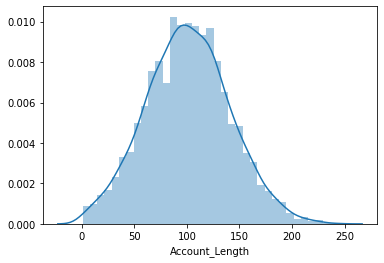

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(telco['Account_Length'])
plt.show()

#### Differences  in account length
* Box plot

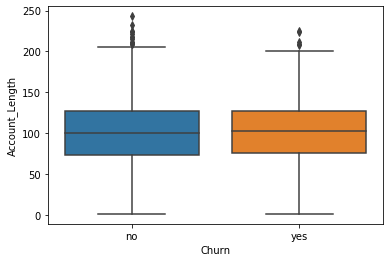

In [15]:
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco)
plt.show()

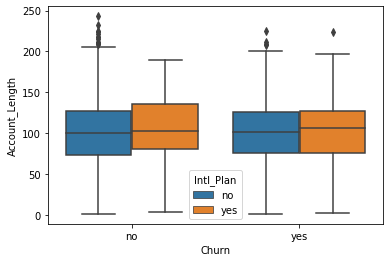

In [17]:
sns.boxplot(x = 'Churn',
            y = 'Account_Length',
            data = telco,
            hue = 'Intl_Plan')
plt.show()

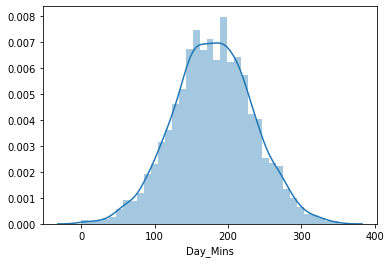

In [18]:
sns.distplot(telco['Day_Mins'])
plt.show()

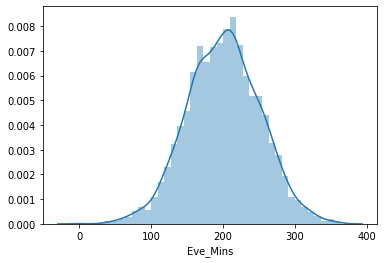

In [19]:
sns.distplot(telco['Eve_Mins'])
plt.show()

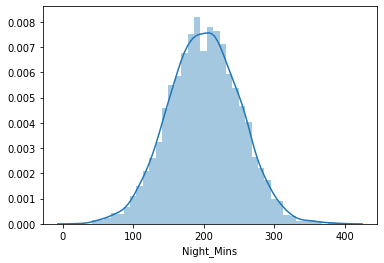

In [20]:
sns.distplot(telco['Night_Mins'])
plt.show()

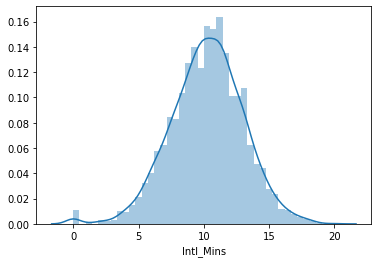

In [21]:
sns.distplot(telco['Intl_Mins'])
plt.show()

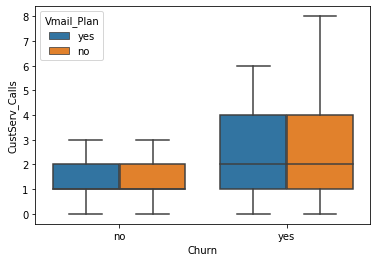

In [24]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

plt.show()

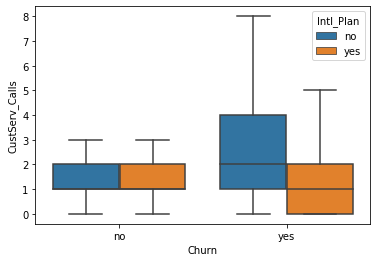

In [25]:
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

plt.show()

## Chapter 2: Preprocessing for Churn Modeling

### Data preprocessing

#### Model assumptions
* Some assumptions that models make:
    * That the features are normally distributed
    * That the features are on the same scale
    
#### Data types
* Machine learning algorithms require numeric data types
    * Need to encode categorical variables as numeric

In [26]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

#### Encoding binary features

In [28]:
telco['Intl_Plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: Intl_Plan, dtype: object

In [75]:
# Option 1: use .replace()

telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0, 'yes':1})
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [76]:
# Option 2: LabelEncoder()

from sklearn.preprocessing import LabelEncoder
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

#### Encoding state
* Don't want to just assign a state to a number because it's confusing and makes your model less effective.

Instead you want to use...


#### One hot encoding
* Creates new binary features for each state that a customer is from
* Avoids any ordering

In [77]:
telco_state = pd.get_dummies(telco['State'])
telco_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature scaling
* Features should be on the same scale
* Rarely true of real-world data

In [78]:
telco['Intl_Calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Intl_Calls, dtype: float64

In [33]:
telco['Night_Mins'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Night_Mins, dtype: float64

#### Standardization
* Centers the distribution around the mean
* Calcualte the number of standard deviations away from the mean each point is

In [49]:
from sklearn.preprocessing import StandardScaler

telco_scaled = StandardScaler().fit_transform(telco[['Intl_Calls', 'Night_Mins']])
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])
telco_scaled_df.head()

,Intl_Calls,Night_Mins
0,-0.601195,0.866743
1,-0.601195,1.058571
2,0.211534,-0.756869
3,1.024263,-0.078551
4,-0.601195,-0.276311


In [50]:
telco_scaled_df.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-8.527366e-18,7.887813e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


### Feature selection and engineering

#### Dropping unnecessary features
* Unique identifiers
    * Phone numbers
    * Social security numbers
    * Account numbers
* `.drop()` method

In [56]:
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Day_Cost'],
      dtype='object')

#### Dropping correlated features
* Highly correlated features can be dropped
* They provide no additional information to the model

In [54]:
telco.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,-0.011886


In the matrix above, `Day_Mins`, `Eve_Mins`, and `Night_Mins` are all highly correlated to `Day_Charge`, `Eve_Charge`, and `Night_Charge` which makes sense.

#### Feature engineering
* Creating new features to help improve model performance
* Should consult with business and subject matter experts

#### Examples of feature engineering
* Total Minutes: Sum of `Day_Mins`, `Eve_Mins`, `Night_Mins`, `Intl_Mins`
* Ratio between Minutes and Charge

In [55]:
telco['Day_Cost'] = telco['Day_Mins'] / telco['Day_Charge']

## Chapter 3: Churn Prediction

### Making Predictions

#### (Supervised) Machine Learning Primer
* Goal: Predict whether or not a customer will churn
* Target Variable: `'Churn'`
* Supervised Machine Learning
* Learn from historical (training) data to make new predictions

#### Model Selection
* Which model to use?
* ... it depends!
* In this course: Experiment with several models


* Logistic regression: Good baseline
    * Offers simplicity and interpretability
    * Cannot capture more complex relationships
* Random forests
    * High performance but limited interpretability
* Support vector machines
    * Generally perform well, but are inefficient trainers and are not very interpretable.
    
#### Training your Model

In [82]:
from sklearn.svm import SVC
svc = SVC()

# Data preprocessing
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']
# telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0, 'yes':1})

svc.fit(telco[features], telco['Churn'])

/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Making a Prediction

In [87]:
new_customer = [[ 91.  ,  23.  , 232.4 , 186.  , 190.5 ,  12.3 ,   3.  ,   0.  ,
          1.  ,  97.  ,  39.51,  88.  ,  15.81, 128.  ,   8.57,   3.  ,
          3.32]]
prediction = svc.predict(new_customer)
print(prediction)

[0]


#### Logisitic Regression Model

In [91]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


### Evaluating Model Performance

#### Accuracy
* One possible metric: Accuracy
    * Total Number of Correct Predictions / Total Number of Data Points
* What data to use?
    * Traning data not representative of new data
    
#### Training and Test Sets
* Fit your classifier to the training set
* Make predictions using the test test

#### Training and Test Sets using scikit-learn

In [104]:
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco[features]

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.predict(X_test)

/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Computing Accurary

In [106]:
svc.score(X_test, y_test)

0.848575712143928

* 84.9% accuracy: Quite good for a first try!

#### Improving your model
* Overfitting: Model first the training data too closely
* Underfitting: Does not capture trends in the training data
* Need to find the right balance between overfitting and underfitting

#### Random Forest Classifier

In [107]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.9385307346326837


/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Model Metrics

#### Imbalanced classes
* There are nearly 6 times as many non-churners than churners, so our model might always learn to predict the majority class.
* So, when working with imbalanced classes, accuracy is NOT a very useful metric
* Need more nuaced metrics

In [108]:
telco['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

#### Confusion Matrix
* Because we defined churn as the positive class:

Actual\Predicted  | No Churn       |Churn
------------------|----------------|-----------
No Churn          |True Negatives  |False Positives
Churn             |False Negatives |True Positives


#### Precision
* True Positives / (True Positives + False Positives)
* A.K.A. the number of correctly classified churners divided by the total number of customers classified as churners.
* A model with high precision indicates:
    * Few false positives ("false alarms")
    * Note many non-churners were classified as churners
    
#### Recall (Sensitivity)
* True Positives / (True Positives + False Negatives)
* A high recall means that the model correctly classified most churners.

#### Precision vs. Recall
* The metric you choose to optimize really depends on the business case.
* If the offers you make to keep potential churners is high in relation to the value of losing customers, you want your model to have high precisoin or minimize false positives.
* If losing customers you didn't think would churn is more expensive than an offer to keep a customer that would not have churned then you want a high recall or minimize false negatives.

#### Confusion Matrix in scikit-learn

In [111]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[562,   4],
       [ 37,  64]])

In [114]:
# Import precision_score
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.9411764705882353


In [115]:
# Import recall_score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.6336633663366337


### Other model metrics

#### Probability thresholds
* Every prediction your classifier maeks has an associated probability
* Default probability threshild in scikit-learn: 50%
    * What is we vary this threshold?
    
#### Generating probabilities in sklearn

In [121]:
clf.predict_proba(X_test)[:,1]

array([0.4, 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.9, 0.2, 0.4, 0.1, 0.5, 0. , 0.1, 0. , 0.1, 0.1, 0.2, 0. , 0. ,
       0. , 0.7, 0. , 0.5, 0.1, 0.1, 0. , 0.1, 0. , 0. , 0. , 0.2, 0.8,
       0.4, 0.1, 0. , 0.1, 0.1, 0. , 0.1, 0.6, 0.4, 0. , 0. , 0.1, 0.3,
       0.3, 0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.2, 0. , 0.1, 0. ,
       0.1, 0. , 0.1, 0.9, 0. , 0.3, 0. , 0. , 0.8, 0. , 0.1, 0. , 0. ,
       0.9, 0.1, 0.1, 0.3, 0.1, 0. , 0. , 0.1, 0. , 0. , 0.1, 0.8, 0.3,
       0.9, 0.8, 0.2, 0. , 0.7, 0.2, 0. , 0. , 0.3, 0. , 0. , 0.3, 0.1,
       0. , 0.2, 0. , 0. , 0.1, 0.2, 0. , 0. , 0.2, 0. , 0. , 0. , 0. ,
       0. , 0.6, 0.1, 0.1, 0. , 0.1, 0. , 0.1, 0.3, 0.8, 0.9, 0. , 0. ,
       0. , 0.1, 0.3, 0. , 0.1, 0. , 0. , 0. , 0.2, 0.2, 0. , 0. , 0. ,
       0.3, 0. , 0.5, 0.1, 0.2, 1. , 0. , 0. , 0. , 0.1, 0.1, 0.8, 0.1,
       0.1, 0.1, 0. , 0.1, 0. , 0.3, 0.1, 0. , 0.1, 0.2, 0. , 0. , 0.5,
       0.6, 0.1, 0. , 0. , 0.1, 0. , 0. , 0. , 0.3, 0.9, 0.7, 0.

In [123]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

#### ROC curve in sklearn

In [124]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

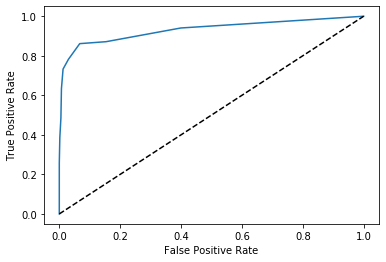

In [127]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

#### Area under the curve

In [130]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9309379701221006

#### F1 score

In [131]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.7719298245614036


/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
